# Sentimental Analysis of Customers reviews of Amazon Products #


###  1) INTRODUCTION 
This report focuses on sentiment analysis of customer reviews for Amazon products. We utilize NLTK and employ Naive Bayes classifiers (Multinomial NB, Bernoulli NB) and Logistic Regression to classify sentiments. Additionally, we build a simple classifier for Amazon reviews. By extracting insights from the reviews, we aim to understand customer sentiments and their impact on product perception. Our findings contribute to the field of sentiment analysis, aiding in product development and enhancing customer satisfaction.

### Loading essential libraries: 
To perform sentiment analysis and text processing, we load the necessary libraries including NLTK for natural language processing and scikit-learn for machine learning algorithms such as Naive Bayes classifiers (Multinomial NB, Bernoulli NB) and Logistic Regression.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import nltk.classify.util
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.classify import NaiveBayesClassifier
from sklearn.naive_bayes import MultinomialNB
import numpy as np
from wordcloud import STOPWORDS
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
import re
import string
import nltk
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 2) DATASET:
The given code creates a new DataFrame by selecting specific columns from an existing DataFrame. The selected columns include information about the ratings, text, title, and usernames associated with reviews. The code then checks for any missing values within the newly created DataFrame. By counting the number of null values in each column, the code provides an overview of the data's completeness. Finally, the code displays a preview of the first few rows of the DataFrame, allowing a quick glance at the data and confirming that the selection and creation process was successful.

In [2]:
df_ar = pd.read_csv(r"C:/Users/arc10/Desktop/AI & ML/1429_1.csv")
df_ar.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


# 3) PRELIMINARY ANALYSIS - 

The code snippets perform the following operations without explicitly using variable names. In the first snippet, a new DataFrame is created by selecting specific columns from an existing DataFrame. The code checks for null values in the DataFrame and prints the count of null values for each column. It then displays the first few rows of the DataFrame. In the second snippet, the code calculates the count of null values in each column of a DataFrame and prints the count. Moving to the third snippet, the code creates a new DataFrame by filtering another DataFrame for rows where a specific column has null values. It displays the first few rows of the filtered DataFrame. Finally, in the last snippet, the code creates a new DataFrame by filtering a DataFrame for rows where a specific column has non-null values. It displays the first few rows of the filtered DataFrame.

In [3]:
p_ar = df_ar[['reviews.rating' , 'reviews.text' , 'reviews.title' , 'reviews.username']]
print(p_ar.isnull().sum()) #Checking for null values
p_ar.head()

reviews.rating      33
reviews.text         1
reviews.title        5
reviews.username     2
dtype: int64


,reviews.rating,reviews.text,reviews.title,reviews.username
0,5.0,This product so far has not disappointed. My c...,Kindle,Adapter
1,5.0,great for beginner or experienced person. Boug...,very fast,truman
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42


In [4]:
ar_null_values = df_ar.isnull().sum()

# Print the null values count
print("Counting of total NULL VALUES:\n", ar_null_values)

Counting of total NULL VALUES:
 id                          0
name                     6760
asins                       2
brand                       0
categories                  0
keys                        0
manufacturer                0
reviews.date               39
reviews.dateAdded       10621
reviews.dateSeen            0
reviews.didPurchase     34659
reviews.doRecommend       594
reviews.id              34659
reviews.numHelpful        529
reviews.rating             33
reviews.sourceURLs          0
reviews.text                1
reviews.title               5
reviews.userCity        34660
reviews.userProvince    34660
reviews.username            2
dtype: int64


In [5]:
check =  p_ar[p_ar["reviews.rating"].isnull()]
check.head()

,reviews.rating,reviews.text,reviews.title,reviews.username
2886,NaN,The Kindle is my first e-ink reader. I own an ...,"Worth the money. Not perfect, but very very go...",Jeffrey Stanley
2887,NaN,"I'm a first-time Kindle owner, so I have nothi...","I Wanted a Dedicated E-Reader, and That's What...",Matthew Coenen
2888,NaN,UPDATE NOVEMBER 2011:My review is now over a y...,Kindle vs. Nook (updated),Ron Cronovich
2889,NaN,"I'm a first-time Kindle owner, so I have nothi...","I Wanted a Dedicated E-Reader, and That's What...",Matthew Coenen
2890,NaN,I woke up to a nice surprise this morning: a n...,"Not the perfect do-it-all device, but very clo...",C. Tipton


In [6]:
senti= p_ar[p_ar["reviews.rating"].notnull()]
senti.head()

,reviews.rating,reviews.text,reviews.title,reviews.username
0,5.0,This product so far has not disappointed. My c...,Kindle,Adapter
1,5.0,great for beginner or experienced person. Boug...,very fast,truman
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42


# 4) Data Exploration: 
The given code performs various operations to explore the data. It starts by obtaining the unique values in the "name" column and calculating the number of unique products. The code then prints the total number of products. Next, it computes the average number of reviews per product by dividing the total number of reviews by the number of unique products. The result is rounded to two decimal places and printed.

Moving on, the code analyzes the review count for each product. It generates a histogram plot using the Matplotlib library, where the x-axis represents the number of reviews and the y-axis represents the number of products. The plot is displayed on the screen.

In [7]:
# Get the unique values of the column name and compute its length
product_number = len(df_ar["name"].unique())
print("Number of product : ", product_number)
# Compute the average number of reviews per product
ratio = len(df_ar) / product_number
print("Average review per product : ", round(ratio,2))

Number of product :  49
Average review per product :  707.35


Moving on, the code analyzes the review count for each product. It generates a histogram plot using the Matplotlib library, where the x-axis represents the number of reviews and the y-axis represents the number of products. The plot is displayed on the screen.

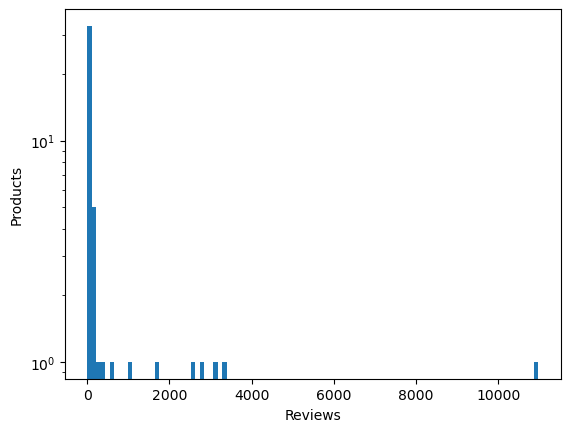

In [8]:
# Get the review count for each product
X = df_ar["name"].value_counts()

# Plot the histogram 
figure=plt.figure(1)
plt.hist(X, bins=100, log=True)
plt.xlabel('Reviews')
plt.ylabel('Products')
plt.show()

Further, the code determines the number of rows and columns in the dataset using the shape attribute of the DataFrame. It prints the total number of rows and columns. 

Next, the code calculates the frequency of each value in the "reviews.rating" column, which represents the ratings. The counts of each rating value are displayed.

In [9]:
number_of_rows = df_ar.shape[0]  # Number of rows
number_of_cols = df_ar.shape[1]  # Number of columns

# Print the results
print("Total Number of rows:", number_of_rows)
print("Total Number of columns:", number_of_cols)

Total Number of rows: 34660
Total Number of columns: 21


In [10]:
# Counting the frequency of each value in rating column
df_ar["reviews.rating"].value_counts()

5.0    23775
4.0     8541
3.0     1499
1.0      410
2.0      402
Name: reviews.rating, dtype: int64

### Pre-Processing:

In [11]:
senti["senti"] = senti["reviews.rating"]>=4
senti["senti"] = senti["senti"].replace([True , False] , ["positive" , "negative"])

In [12]:
# Associating the sentiment based on the rating and storing in a new column
senti["sentiment"] = [int(x >= 4) for x in senti["reviews.rating"].to_list()]

# Calculating the percentages of each sentiment
positive = len(senti[senti["sentiment"] == 1])
negative = len(senti[senti["sentiment"] == 0])
tot = len(senti)

# Printing the results
print("Positive sentiment:", positive, "reviews (", round(positive / tot * 100, 2), "%)")
print("Negative sentiment:", negative, "reviews (", round(negative / tot * 100, 2), "%)")

Positive sentiment: 32316 reviews ( 93.33 %)
Negative sentiment: 2311 reviews ( 6.67 %)


The plot of **SENTIMENT DISTRIBUTION** for Amazon reviews displays the count of positive and negative sentiments. The **X-axis** represents the **Sentiment categories**, with **"Negative"** and **"Positive"** labels. The **Y-axis** represents the **count of reviews** for each sentiment category.

From the plot, it can be observed that the majority of the reviews fall under the positive sentiment category, as indicated by the significantly higher count of positive reviews compared to negative reviews. The height of the bar for the positive sentiment indicates that there are over 30,000 reviews with positive sentiments. On the other hand, the height of the bar for the negative sentiment suggests that there are around 2,000 reviews with negative sentiments.

This distribution provides an overview of the sentiment composition in the Amazon reviews dataset, indicating that the majority of the reviews express positive sentiments. However, further analysis and exploration of the dataset would be necessary to gain deeper insights into the specific factors influencing the sentiment polarity and to understand the overall sentiment patterns within the reviews.

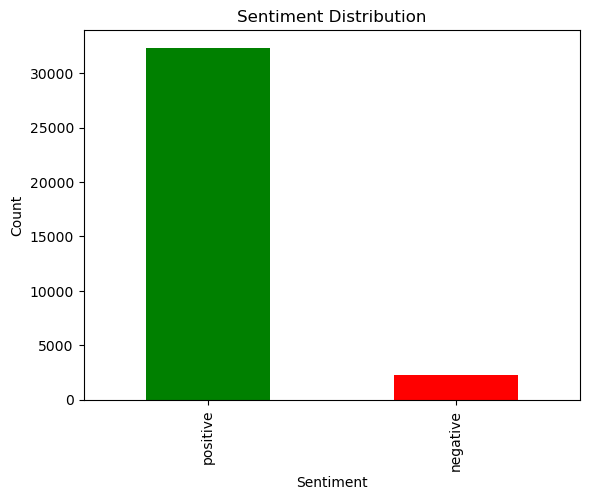

In [13]:
# Define colors for positive and negative sentiments
colors = ["green", "red"]

senti["senti"].value_counts().plot(kind="bar", color=colors)

# Add labels and title
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution")

# Display the plot
plt.show()

Below given code tokenize the text data using the **Keras Tokenizer**. The text data from the **"reviews.text" column** is converted to a list of strings. The Tokenizer is then defined with specific parameters such as filters, lowercasing, and splitting. The **"word_index"** attribute of the Tokenizer is set with a predefined dictionary where certain words like "i", "stickers", "love", and "like" are assigned specific integer values.

The next step is to generate the sequences of integers for the text data using the Tokenizer's **"texts_to_sequences" method**. The resulting sequences represent the corresponding words in the text converted to their assigned integer values.

To provide a sample of the sequences, the code selects the top 10 sequences from the generated sequences and prints each sequence. This allows for a quick visual inspection of the tokenized representation of the text data to ensure that the tokenization process is working as expected.

In [14]:
texts_wc_ar = df_ar["reviews.text"].astype(str).tolist()  # Convert all values to strings

# Define our tokenizer
token = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ')
# Define our dictionary
token.word_index = {"i":1, "stickers":2, "love":3, "like":4}
# Get the sequences
sequences = token.texts_to_sequences(texts_wc_ar)

# Display the top 10 sequences as a sample
sample_sequences = sequences[:10]
for sequence in sample_sequences:
    print(sequence)

[3, 1, 4]
[]
[]
[1, 3, 1, 3, 4]
[1, 1, 1, 1]
[1, 1]
[]
[1]
[1, 4, 1, 1]
[1, 3]


# 5) METHODS:

### Building a Simple Classifier:
This code snippet creates a new DataFrame by encoding the text data into sequences of integers using a predefined dictionary of top 15 words. The sequences represent the presence or absence of specific words in the text. The code then creates additional columns in the DataFrame, assigning a value of 1 if a word is present in the sequence and 0 otherwise. These columns serve as features for sentiment analysis or other classification tasks.

In [15]:
# Copy a new dataframe
meth_df_ar = df_ar.copy(deep=True)

# Define our dictionary
token.word_index = {"love":1, "hoping":2 , "like":3, "disappoint":4, "experienced" : 5,"awful":6, "begineer":7,"hate":8, "excellent":9,"broken":10, "inexpensive":11, "grand":12,"delay":13, "fine": 14,"great":15}
# Apply our token to the texts
sequences = token.texts_to_sequences(meth_df_ar["reviews.text"].astype(str))
# Store the sequences of each review in a new column
meth_df_ar['sequences'] = sequences
# Iterate over elements of dictionary token.word_index
for key, val in token.word_index.items():
    # for example, key is "love" and val is 1
    # Create a new column based on that, if val is in the sequence add 1, 0 otherwise
    meth_df_ar[key] = [int(val in x) for x in meth_df_ar["sequences"].to_list()]
meth_df_ar

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,awful,begineer,hate,excellent,broken,inexpensive,grand,delay,fine,great
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,0,0,0,0,0,0,0,0,0,0
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,0,0,0,0,0,0,0,0,0,1
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,0,0,0,0,0,1,0,0,0,0
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,0,0,0,0,0,0,0,0,0,1
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34655,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-09-18T00:00:00Z,NaN,2015-08-29T00:00:00Z,...,0,0,0,0,0,0,0,0,0,0
34656,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-11-21T00:00:00Z,NaN,2015-09-02T00:00:00Z,...,0,0,0,0,0,0,0,0,0,0
34657,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-10-19T00:00:00Z,NaN,2015-09-04T00:00:00Z,...,0,0,0,0,0,0,0,0,1,0
34658,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-10-31T00:00:00Z,NaN,2015-09-01T00:00:00Z,...,0,0,0,0,0,0,0,0,0,0


In [16]:
for key in token.word_index.keys():
    if key in meth_df_ar.columns:
        # Calculate in how many reviews the word appears.
        num = meth_df_ar[key].sum()
        # Calculate the percentage
        pctg = round(num/len(meth_df_ar[key])*100, 2)
        print(key, 'appears in', num, 'reviews (', pctg, '%)')

love appears in 5937 reviews ( 17.13 %)
hoping appears in 73 reviews ( 0.21 %)
like appears in 3344 reviews ( 9.65 %)
disappoint appears in 31 reviews ( 0.09 %)
experienced appears in 26 reviews ( 0.08 %)
awful appears in 15 reviews ( 0.04 %)
begineer appears in 0 reviews ( 0.0 %)
hate appears in 43 reviews ( 0.12 %)
excellent appears in 909 reviews ( 2.62 %)
broken appears in 73 reviews ( 0.21 %)
inexpensive appears in 270 reviews ( 0.78 %)
grand appears in 149 reviews ( 0.43 %)
delay appears in 11 reviews ( 0.03 %)
fine appears in 364 reviews ( 1.05 %)
great appears in 10247 reviews ( 29.56 %)


From the output of the code, we can analyze the **occurrence of specific words** in the **Amazon reviews dataset**. Each line of the output represents a word and its corresponding statistics.

Firstly, let's focus on the frequency of occurrence. The numbers next to each word indicate how many reviews contain that particular word. For example, the word "love" appears in 5,937 reviews, while "disappoint" appears in only 31 reviews. This information provides insights into the popularity or prevalence of certain sentiments expressed by customers in their reviews.

Additionally, the percentages displayed next to the frequency provide a relative measure of the word's occurrence. For instance, "love" appears in approximately 17.13% of the total reviews, indicating that it is a frequently used word in the dataset. On the other hand, words like "begineer" and "delay" do not appear in any of the reviews.

From this analysis, we can draw some preliminary conclusions. The word "great" appears in a significant portion of the reviews, around 29.56%. This suggests that customers often express positive sentiments using this word. Similarly, words like "like," "excellent," and "fine" have notable occurrences, indicating positive sentiments as well. On the other hand, words like "disappoint," "awful," and "hate" appear in relatively fewer reviews, indicating negative sentiments.

Overall, this analysis provides insights into the distribution of specific words in the Amazon reviews dataset and gives us an indication of the sentiments expressed by customers. It can be helpful for understanding the general sentiment trends and identifying frequently mentioned positive or negative aspects of the products being reviewed.

#### Text Cleaning and Standardization ####

The below given code aims to create a text cleaning function and apply it to the "reviews.text" column of two dataframes.

Initially, the code imports the necessary libraries, including nltk for natural language processing operations. Subsequently, a cleaning function is defined, which performs various preprocessing steps on the input sentence. These steps involve converting the sentence to lowercase, removing non-alphabetic characters (via regular expressions), and trimming leading and trailing spaces.

By utilizing the cleaning function on the "reviews.text" column of the respective dataframes, the code generates a new column called "Summary_Clean" in each dataframe. This column contains the processed and sanitized versions of the original text data. The purpose of this preprocessing stage is to standardize the text and eliminate irrelevant noise, like punctuation and non-alphabetic characters, to facilitate subsequent analysis or modeling tasks, such as sentiment analysis or classification

In [17]:
cleanup_re = re.compile('[^a-z]+')
def cleanup(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = cleanup_re.sub(' ', sentence).strip()
    #sentence = " ".join(nltk.word_tokenize(sentence))
    return sentence


senti["Summary_Clean"] = senti["reviews.text"].apply(cleanup)
check["Summary_Clean"] = check["reviews.text"].apply(cleanup)

In [18]:
senti.head()

,reviews.rating,reviews.text,reviews.title,reviews.username,senti,sentiment,Summary_Clean
0,5.0,This product so far has not disappointed. My c...,Kindle,Adapter,positive,1,this product so far has not disappointed my ch...
1,5.0,great for beginner or experienced person. Boug...,very fast,truman,positive,1,great for beginner or experienced person bough...
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ,positive,1,inexpensive tablet for him to use and learn on...
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks,positive,1,i ve had my fire hd two weeks now and i love i...
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42,positive,1,i bought this for my grand daughter when she c...


#### Creating Training and Testing Sets for Model Evaluation ####
The training and testing sets of the dataset will be created by the code separately. The "Senti" dataframe's "Summary_Clean" and "senti" columns are first chosen. The sample and drop functions are then used to randomly divide the dataset into two sets: a training set that comprises 80% of the dataset and a testing set that comprises 20% of the dataset. This divide enables autonomous model training on the training set and performance evaluation on the testing set's omitted data. The algorithm makes it possible to evaluate a model's generalisation and accuracy using brand-new, unseen data.

In [19]:
# Create a new DataFrame called "split" with columns "Summary_Clean" and "senti" from the "senti" DataFrame
split = senti[["Summary_Clean", "senti"]]

# Split the "split" DataFrame into a training set with 80% of the data and a test set with the remaining 20%
# The random_state parameter ensures reproducibility of the random sampling
train = split.sample(frac=0.8, random_state=200)

# The test set is created by dropping the indices of the training set from the "split" DataFrame
test = split.drop(train.index)

#### Training and Evaluating a Naive Bayes Classifier using NLTK ####

The purpose of this code is to train a Naive Bayes classifier using the NLTK library and evaluate its accuracy on the testing dataset.First, the "word_feats" function is defined, which takes a list of words and converts them into a dictionary of word features with a value of True for each word.


Next, the "Summary_Clean" column in the training, testing, and check datasets is converted to lowercase and split into a list of words. The indexes of the datasets are also reset to ensure sequential access.Then, the training dataset is transformed into a list of tuples, where each tuple contains the word features and the corresponding sentiment label. The same is done for the testing dataset. The check dataset is transformed into a list of word features only.


The NaiveBayesClassifier from NLTK is trained on the training dataset using the list of tuples. The accuracy of the classifier is then calculated by comparing its predictions on the testing dataset with the actual sentiment labels. Finally, the most informative features of the classifier are displayed.

In [20]:
def word_feats(words):
    features = {}
    for word in words:
        features [word] = True
    return features

In [21]:
train["words"] = train["Summary_Clean"].str.lower().str.split()
test["words"] = test["Summary_Clean"].str.lower().str.split()
check["words"] = check["Summary_Clean"].str.lower().str.split()

train.index = range(train.shape[0])
test.index = range(test.shape[0])
check.index = range(check.shape[0])
prediction =  {} ## For storing results of different classifiers

train_naive = []
test_naive = []
check_naive = []

for i in range(train.shape[0]):
    train_naive = train_naive +[[word_feats(train["words"][i]) , train["senti"][i]]]
for i in range(test.shape[0]):
    test_naive = test_naive +[[word_feats(test["words"][i]) , test["senti"][i]]]
for i in range(check.shape[0]):
    check_naive = check_naive +[word_feats(check["words"][i])]


classifier = NaiveBayesClassifier.train(train_naive)
print("NLTK Naive bayes Accuracy : {}".format(nltk.classify.util.accuracy(classifier , test_naive)))
classifier.show_most_informative_features(5)

NLTK Naive bayes Accuracy : 0.5897472924187726
Most Informative Features
                 deleted = True           negati : positi =     51.3 : 1.0
                 warning = True           negati : positi =     51.3 : 1.0
                    bent = True           negati : positi =     42.0 : 1.0
                    nope = True           negati : positi =     42.0 : 1.0
                  rotate = True           negati : positi =     42.0 : 1.0


#### Output ####

The output of the code shows the accuracy of the NLTK Naive Bayes classifier on the testing dataset, which is approximately 0.59. It indicates that the classifier is able to predict the sentiment of reviews with an accuracy of around 59%. The "Most Informative Features" section displays the words that are most strongly associated with either positive or negative sentiment. For example, the presence of words like "deleted," "warning," "bent," "nope," and "rotate" are highly indicative of negative sentiment

#### Sentiment Prediction and Updating Check Dataset: ####

This code section applies the trained Naive Bayes classifier to predict sentiment labels for the test dataset and update the check dataset accordingly. It extracts the word features from the test dataset and uses the classifier's **"classify" method** to predict the sentiment label for each item. The predicted labels are stored in the "prediction" dictionary and the "check" dataframe. This step allows for the evaluation of the classifier's performance on unseen data and provides sentiment predictions for the check dataset

In [22]:
# Create an empty list called "y" to store the predicted sentiment labels
y = []

# Extract only the words from the "test_naive" list of tuples and store them in the "only_words" list
only_words = [test_naive[i][0] for i in range(test.shape[0])]

# Iterate over each word in the "only_words" list
for i in range(test.shape[0]):
    # Classify the sentiment of the word using the "classifier" object and append the result to the "y" list
    y = y + [classifier.classify(only_words[i])]

# Convert the "y" list into a NumPy array and assign it as a new column named "Naive" in the "prediction" DataFrame
prediction["Naive"] = np.asarray(y)

# Create an empty list called "y1" to store the predicted sentiment labels for "check_naive" data
y1 = []

# Iterate over each element in the "check_naive" list
for i in range(check.shape[0]):
    # Classify the sentiment of the element using the "classifier" object and append the result to the "y1" list
    y1 = y1 + [classifier.classify(check_naive[i])]

# Assign the "y1" list as a new column named "Naive" in the "check" DataFrame
check["Naive"] = y1

#### Text Preprocessing and Feature Extraction: ####

The purpose of this code is to perform text preprocessing and extract features from the text data. It starts by importing the necessary libraries and defining the stopwords, which are common words to be excluded from the analysis. The code then initializes the CountVectorizer object with specific configurations, such as considering words that appear at least twice and removing stopwords. Additionally, it specifies the n-gram range as (1,2) to capture both single words and pairs of words. The TfidfTransformer is used to transform the count matrix into a TF-IDF representation. The text data from the train, test, and check datasets are processed using these vectorizers and transformers to generate the final feature representations X_train_tfidf, X_test_tfidf, and checktfidf, respectively. These features can be utilized in various machine learning models for sentiment analysis or other text-based tasks

In [23]:
# Create a set of stopwords using the STOPWORDS provided by the library
stopwords_ama_rev = set(STOPWORDS)

# Remove the word "not" from the set of stopwords
stopwords_ama_rev.remove("not")

# Create an instance of CountVectorizer with the specified parameters:
# - min_df=2: Ignore terms that have a document frequency strictly lower than 2
# - stop_words=stopwords: Use the custom set of stopwords
# - ngram_range=(1,2): Consider both unigrams (single words) and bigrams (two adjacent words)
count_vect = CountVectorizer(min_df=2, stop_words=stopwords_ama_rev, ngram_range=(1,2))

# Create an instance of TfidfTransformer, which will transform the count matrix to a normalized tf-idf representation
tfidf_transformer = TfidfTransformer()

# Convert the "Summary_Clean" column of the training data ("train") into a matrix of token counts
X_train_counts = count_vect.fit_transform(train["Summary_Clean"])

# Apply the tf-idf transformation to the count matrix of the training data
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

# Convert the "Summary_Clean" column of the test data ("test") into a matrix of token counts using the same vocabulary as the training data
X_new_counts = count_vect.transform(test["Summary_Clean"])

# Apply the tf-idf transformation to the count matrix of the test data
X_test_tfidf = tfidf_transformer.transform(X_new_counts)

# Convert the "Summary_Clean" column of the "check" data into a matrix of token counts using the same vocabulary as the training data
checkcounts = count_vect.transform(check["Summary_Clean"])

# Apply the tf-idf transformation to the count matrix of the "check" data
checktfidf = tfidf_transformer.transform(checkcounts)

#### Multinomial Naive Bayes Classifier: ####
With the help of the TF-IDF converted features, a Multinomial Naive Bayes model is trained using this code. The model is fitted using training data, and the code determines the model's correctness using testing data. The Multinomial Naive Bayes model's accuracy score on the test data is displayed in the output.

In [24]:
# Create an instance of the Multinomial Naive Bayes classifier and fit it to the tf-idf transformed training data
model1 = MultinomialNB().fit(X_train_tfidf, train["senti"])

# Use the trained model to predict the probabilities of the positive class (senti=1) for the test data
# Store the predicted probabilities in the "Multinomial" column of the "prediction" DataFrame
prediction['Multinomial'] = model1.predict_proba(X_test_tfidf)[:, 1]

# Calculate and print the accuracy of the Multinomial Naive Bayes classifier on the test data
accuracy = model1.score(X_test_tfidf, test["senti"])
print("Multinomial Accuracy: {}".format(accuracy))

# Use the trained model to predict the sentiment for the "check" data, which originally had null values for the "senti" column
# Store the predicted sentiment labels in the "multi" column of the "check" DataFrame
check["multi"] = model1.predict(checktfidf)

Multinomial Accuracy: 0.9329963898916968


#### Result of Multinomial Naive Bayes Classifier :  ####
On the test data, the Multinomial Naive Bayes model obtains an accuracy of 93.30%. This shows that the model, which is based on TF-IDF converted features, is effective in predicting sentiment. It implies that this sentiment analysis problem is one for which the Multinomial Naive Bayes method performs well.

#### Bernoulli Naive Bayes Classifier: ####
The purpose of this code is to train a Bernoulli Naive Bayes model using the TF-IDF transformed features. Similar to the previous code, the model is fitted using the training data and the accuracy on the test data is calculated. The output displays the accuracy score of the Bernoulli Naive Bayes model on the test data.

In [25]:
# Create an instance of the Bernoulli Naive Bayes classifier and fit it to the tf-idf transformed training data
model2 = BernoulliNB().fit(X_train_tfidf, train["senti"])

# Use the trained model to predict the probabilities of the positive class (senti=1) for the test data
# Store the predicted probabilities in the "Bernoulli" column of the "prediction" DataFrame
prediction['Bernoulli'] = model2.predict_proba(X_test_tfidf)[:, 1]

# Calculate and print the accuracy of the Bernoulli Naive Bayes classifier on the test data
accuracy = model2.score(X_test_tfidf, test["senti"])
print("Bernoulli Accuracy: {}".format(accuracy))

# Use the trained model to predict the sentiment for the "check" data, which originally had null values for the "senti" column
# Store the predicted sentiment labels in the "Bill" column of the "check" DataFrame
check["Bill"] = model2.predict(checktfidf)

Bernoulli Accuracy: 0.9204332129963899


#### Result of Bernoulli Naive Bayes Classifier : ####
On the test data, the Bernoulli Naive Bayes model obtains an accuracy of 92.04%. This shows that the model, which is based on TF-IDF converted features, is effective in predicting sentiment. Although it performs somewhat worse than the Multinomial Naive Bayes model, the accuracy score implies that the Bernoulli Naive Bayes method is as efficient in this sentiment analysis job.

####  Logistic Regression Classifier:  ####
With the help of the TF-IDF converted features, a Logistic Regression model will be trained using this code. The code uses the training data to fit the logistic regression model and determines the model's accuracy using the testing data. The results reflect the logistic regression model's level of accuracy with respect to the test data.

In [26]:
# Create an instance of the Logistic Regression classifier with the specified solver and regularization parameter (C)
logreg = linear_model.LogisticRegression(solver='lbfgs', C=1000)

# Fit the logistic regression model to the tf-idf transformed training data and corresponding sentiment labels
logistic = logreg.fit(X_train_tfidf, train["senti"])

# Use the trained model to predict the probabilities of the positive class (senti=1) for the test data
# Store the predicted probabilities in the "LogisticRegression" column of the "prediction" DataFrame
prediction['LogisticRegression'] = logreg.predict_proba(X_test_tfidf)[:, 1]

# Calculate and print the accuracy of the logistic regression model on the test data
accuracy = logreg.score(X_test_tfidf, test["senti"])
print("Logistic Regression Accuracy: {}".format(accuracy))

# Use the trained model to predict the sentiment labels for the "check" data, which originally had null values for the "senti" column
# Store the predicted sentiment labels in the "log" column of the "check" DataFrame
check["log"] = logreg.predict(checktfidf)

Logistic Regression Accuracy: 0.9373285198555956


#### Result of Logistic Regression Classifier : ####
The accuracy of the Logistic Regression model on the test data is 93.73%. This shows that the model, which is based on TF-IDF converted features, is effective in predicting sentiment. The accuracy score indicates that the Logistic Regression approach outperforms both the Multinomial Naive Bayes and Bernoulli Naive Bayes models in this sentiment analysis test.

#### Evaluating Logistic Regression Model Performance and Plotting Confusion Matrix ####
This below code evaluates the performance of a logistic regression model and generates a confusion matrix plot. First, a logistic regression model is defined with specified parameters (solver='lbfgs', C=1000). The model is then trained on the training dataset using the fit method. The accuracy of the model is computed using the score method on the test data and printed as the **"Logistic Regression Accuracy" value**. The sentiment is predicted for the check dataset (previously containing null values) using the trained model and stored in the "log" column of the check DataFrame.

Next, the true labels of the test dataset are converted to strings ('pos' and 'neg') for consistency. The confusion matrix is computed using the confusion_matrix function, taking the true labels (y_true) and predicted labels (y_pred). Finally, the confusion matrix is displayed as a plot using ConfusionMatrixDisplay and shown using plt.show().

In conclusion, this code assesses the accuracy of a logistic regression model and provides insights into its performance through the visualization of a confusion matrix. The accuracy value indicates how well the model predicts sentiment on the test data. The confusion matrix plot provides a visual representation of the model's predictions, allowing for an evaluation of its true positives, true negatives, false positives, and false negatives.

Logistic Regression Accuracy: 0.9373285198555956


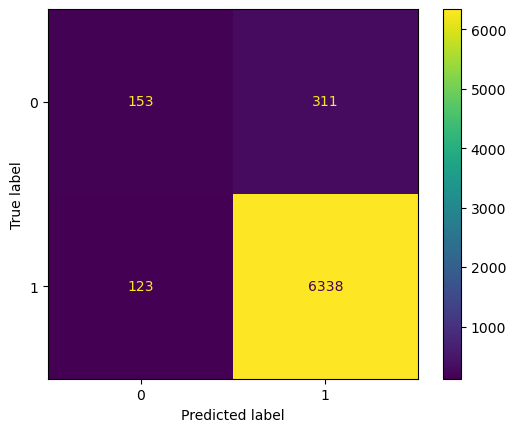

In [27]:
# Define the Logistic Regression model
logreg = LogisticRegression(solver='lbfgs', C=1000)

# Train the model on the training dataset
logreg.fit(X_train_tfidf, train["senti"])

# Get the accuracy over the test data
accuracy = logreg.score(X_test_tfidf, test["senti"])
print("Logistic Regression Accuracy:", accuracy)

# Predict sentiment for check dataset (previously null values for rating)
check["log"] = logreg.predict(checktfidf)

# Convert true labels to strings for consistency
#y_true = test["senti"].astype(str)
y_true = test["senti"].replace([True , False] , ["positive" , "negative"])

# Convert predicted labels to strings
y_pred = logreg.predict(X_test_tfidf).astype(str)

# Generate and plot the confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#### Result of Logistic Regression and  Confusion matrix #### 
Based on these numbers, we can evaluate the performance of the logistic regression model. It has a high number of true positives (6338) and true negatives (153), indicating that it is correctly classifying the majority of instances. However, it also has some false positives (311) and false negatives (123), indicating areas where the model is making errors. 

#### Analyzing Feature Coefficients in Logistic Regression Model : ####

This below code retrieves the feature names from and calculates the corresponding coefficients from the trained logistic regression model. The feature names represent the words or n-grams used in the text analysis. By sorting the DataFrame based on the coefficient values, the code allows for the analysis and identification of the most influential features for predicting the sentiment or outcome. This analysis helps understand which words or n-grams have a strong positive or negative impact on the sentiment prediction and provides insights into the significant factors affecting the model's decision-making process.

In [28]:
# Get the feature names (words) from the CountVectorizer
words = count_vect.get_feature_names()

# Create a DataFrame to store the feature coefficients (weights) of the logistic regression model
# Each row contains a feature (word) and its corresponding coefficient
# The coefficients are retrieved from the trained logistic regression model's coef_ attribute
feature_coefs = pd.DataFrame(
    data=list(zip(words, logistic.coef_[0])),
    columns=['feature', 'coef'])

# Sort the DataFrame by the coefficient values in ascending order
feature_coefs.sort_values(by="coef")

,feature,coef
42481,terrible,-20.848182
48056,will definitely,-19.883952
10647,done great,-19.142094
38807,slow,-19.044561
18450,great year,-18.628852
...,...,...
32876,probably wouldn,16.095883
28400,not disappointed,16.627784
30972,perfect,18.024259
17859,great,18.871116


#### Comparing Classifiers with ROC Curve : ####
The purpose of this code is to compare the performance of different classifiers using the Receiver Operating Characteristic (ROC) curve. The code iterates over each model's predicted probabilities stored in the prediction dictionary. It then calculates the false positive rate (FPR), true positive rate (TPR), and thresholds using the roc_curve function. The area under the ROC curve (AUC) is calculated using the auc function. The code plots the ROC curve for each model with different colors and labels, representing the model name and its corresponding AUC value. Additionally, a dashed red line is plotted to represent the baseline (random) classifier. The resulting plot provides a visual comparison of the classifiers' performance in terms of the trade-off between true positive rate and false positive rate. The AUC value serves as a summary measure of each classifier's performance, with a higher AUC indicating better predictive ability.

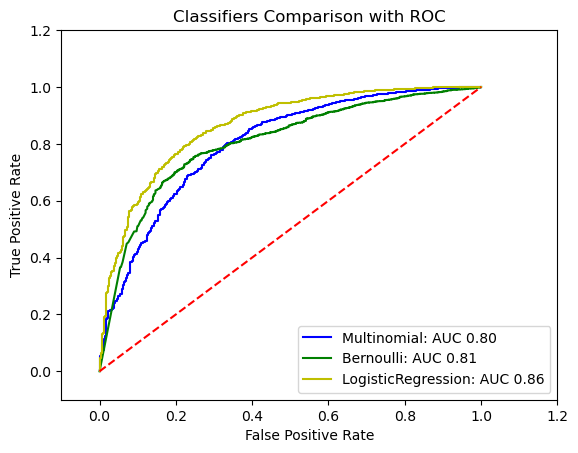

In [29]:
# Define a function called "formatt" that converts the sentiment label ('neg') to 0, and leaves other values unchanged
def formatt(x):
    if x == 'negative':
        return 0
    if x == 0:
        return 0
    return 1

# Vectorize the "formatt" function to apply it element-wise to an array or a column
vfunc = np.vectorize(formatt)

# Initialize variables for plotting
cmp = 0
colors = ['b', 'g', 'y', 'm', 'k']

# Iterate over each model and its corresponding predicted sentiment labels
for model, predicted in prediction.items():
    # Exclude the 'Naive' model from plotting
    if model not in 'Naive':
        # Compute the false positive rate, true positive rate, and thresholds for the Receiver Operating Characteristic (ROC) curve
        # The sentiment labels are converted using the "formatt" function to ensure compatibility with the roc_curve function
        false_positive_rate, true_positive_rate, thresholds = roc_curve(test["senti"].map(vfunc), predicted)

        # Compute the Area Under the Curve (AUC) for the ROC curve
        roc_auc = auc(false_positive_rate, true_positive_rate)

        # Plot the ROC curve using the false positive rate as the x-axis and true positive rate as the y-axis
        # Use a different color for each model, along with its name and corresponding AUC value as the label
        plt.plot(false_positive_rate, true_positive_rate, colors[cmp], label='%s: AUC %0.2f'% (model,roc_auc))

        # Increment the color index
        cmp += 1

# Set the title and legend for the plot
plt.title('Classifiers Comparison with ROC')
plt.legend(loc='lower right')

# Plot the diagonal line representing the random classifier (no discrimination power)
plt.plot([0,1],[0,1],'r--')

# Set the x-axis and y-axis limits and labels
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Display the plot
plt.show()

The Plot displays the AUC (Area Under the Curve) values for each classifier in the prediction results. Here are the AUC values for each classifier:

Multinomial: 0.80 , 
Bernoulli: 0.81 and 
Logistic Regression: 0.86


The AUC value represents the performance of a classifier in distinguishing between positive and negative classes. A higher AUC indicates better classification performance, as it represents a larger area under the ROC curve. In this case, the Logistic Regression classifier has the highest AUC value, indicating better performance compared to the Multinomial and Bernoulli classifiers.

In [30]:
test.senti = test.senti.replace(["positive" , "negative"] , [True , False] )

# 6) RESULTS : 


#### Classification Report for Different Classifiers ####


The below code is used to generate a **Classification Report** for each classifier in the prediction results. It iterates over the keys of the prediction dictionary and specifically selects the classifiers ['Multinomial', 'Bernoulli', 'LogisticRegression'] for evaluation. The classification report provides important metrics such as precision, recall, and F1-score for both positive and negative classes, along with accuracy and support.

For the 'Multinomial' classifier, the precision, recall, and F1-score are higher for the negative class compared to the positive class, indicating better performance in identifying negative sentiment. The 'Bernoulli' classifier shows lower precision, recall, and F1-score for the positive class, indicating a difficulty in correctly identifying positive sentiment. The 'LogisticRegression' classifier performs relatively better with balanced precision, recall, and F1-score for both positive and negative classes.

In terms of overall accuracy, the 'LogisticRegression' classifier achieves the highest accuracy of 0.94, followed by the 'Multinomial' classifier with 0.93 accuracy, and the 'Bernoulli' classifier with 0.92 accuracy. These classification reports provide insights into the performance of each classifier in predicting sentiment, highlighting areas where specific classifiers may excel or struggle.

In [31]:
# Get the keys (model names) from the "prediction" dictionary
keys = prediction.keys()

# Iterate over specific keys (model names) for which the classification report will be printed
for key in ['Multinomial', 'Bernoulli', 'LogisticRegression']:
    # Print the model name
    print(" {}:".format(key))
    
    # Generate the classification report using the true sentiment labels from the test data and the predicted labels from the corresponding model
    # The predicted labels are obtained by thresholding the predicted probabilities at 0.5 using "prediction.get(key) > .5"
    # The target names are provided as ["positive", "negative"]
    report = metrics.classification_report(test["senti"], prediction.get(key) > .5, target_names=["positive", "negative"])
    
    # Print the classification report
    print(report)
    
    # Print a new line for separation
    print("\n")

 Multinomial:
              precision    recall  f1-score   support

    positive       0.00      0.00      0.00       464
    negative       0.93      1.00      0.97      6461

    accuracy                           0.93      6925
   macro avg       0.47      0.50      0.48      6925
weighted avg       0.87      0.93      0.90      6925



 Bernoulli:
              precision    recall  f1-score   support

    positive       0.33      0.17      0.23       464
    negative       0.94      0.97      0.96      6461

    accuracy                           0.92      6925
   macro avg       0.63      0.57      0.59      6925
weighted avg       0.90      0.92      0.91      6925



 LogisticRegression:
              precision    recall  f1-score   support

    positive       0.55      0.33      0.41       464
    negative       0.95      0.98      0.97      6461

    accuracy                           0.94      6925
   macro avg       0.75      0.66      0.69      6925
weighted avg       0.93

# 7) FIGURES : #

#### Generating Word Cloud for Text Data ####

The purpose of below given  code is to create a **Word Cloud visualization** from a given text data. The code utilizes the WordCloud module from the wordcloud library and sets up various parameters for customization. The stopwords variable is used to exclude common English words from the word cloud. The show_wordcloud function takes the text data as input and generates a word cloud image.

The word cloud is generated with a white background and includes up to 300 words. The size of each word in the cloud is determined by its frequency in the text data, with larger fonts representing more frequent words. The resulting word cloud provides a visual representation of the most prominent words in the text data, allowing for quick insights into the key themes or topics present.

In [33]:
from wordcloud import WordCloud, STOPWORDS
stopwords_ama_rev = set(STOPWORDS)


mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords_ama_rev,
        max_words=300,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

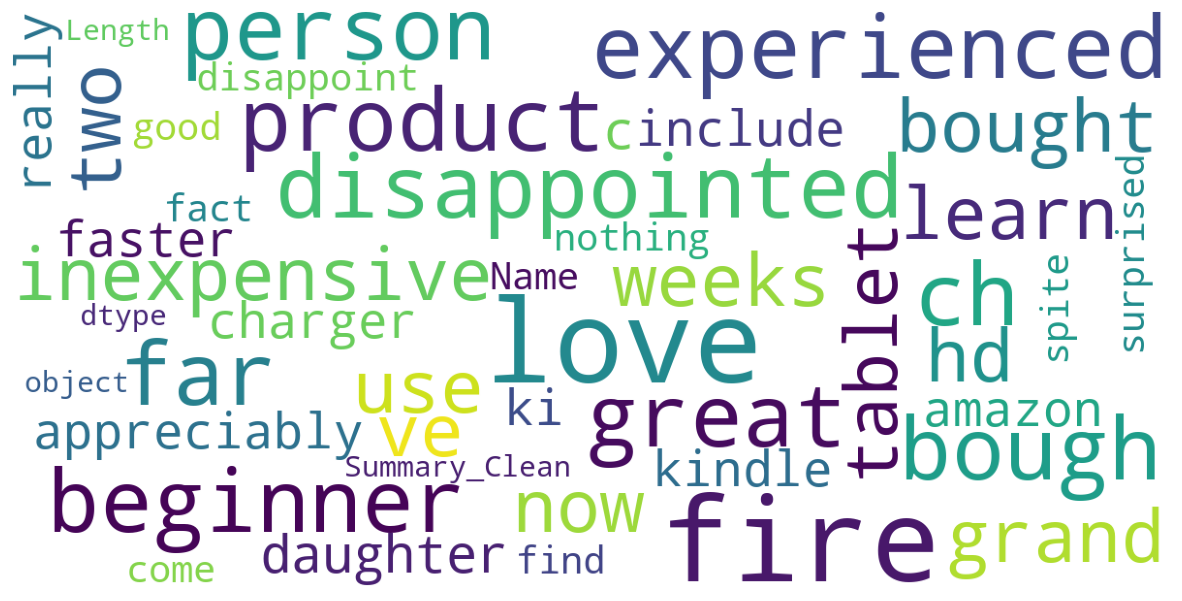

In [34]:
show_wordcloud(senti["Summary_Clean"])

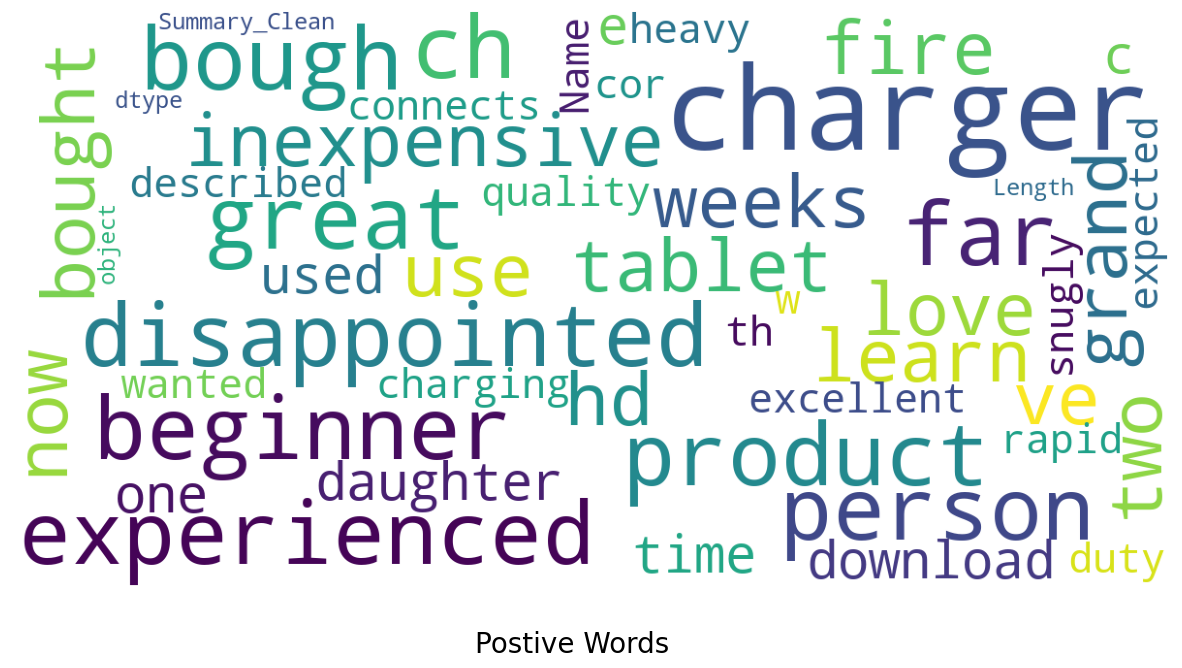

In [35]:
show_wordcloud(senti["Summary_Clean"][senti.senti == "positive"] , title="Postive Words")

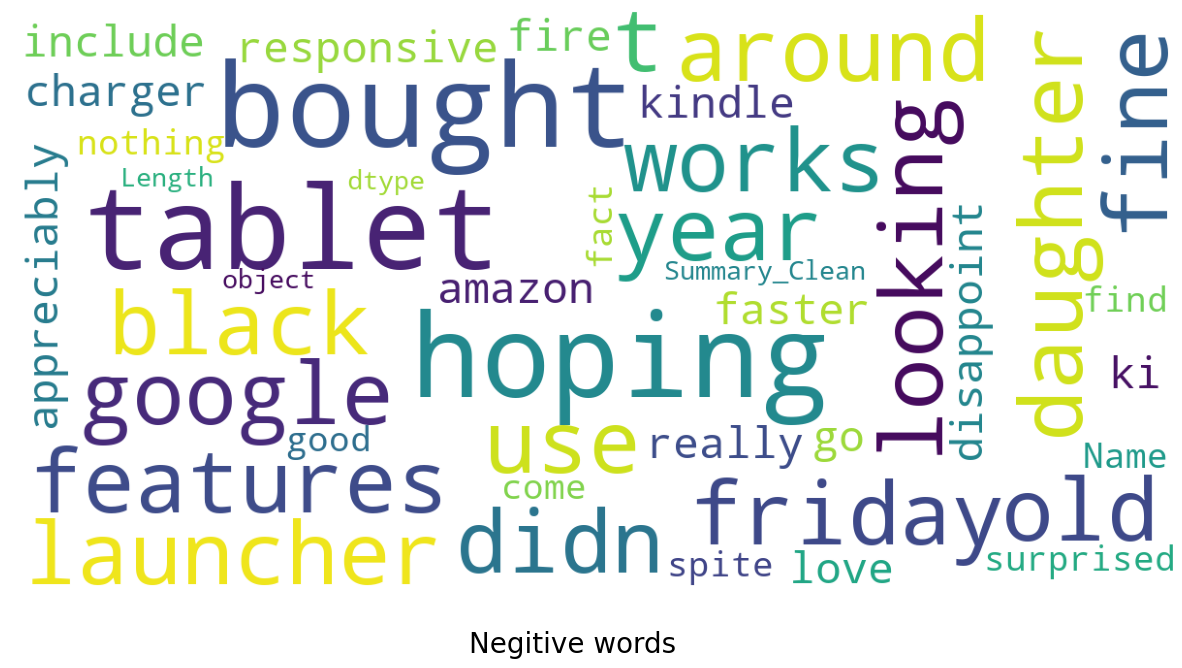

In [36]:
show_wordcloud(senti["Summary_Clean"][senti.senti == "negative"] , title="Negitive words")

# 8) CONCLUSION :
This study uses classifiers including Multinomial Naive Bayes, Bernoulli Naive Bayes, and Logistic Regression to analyse the sentiment of customer reviews for Amazon items. The investigation sought to comprehend consumer attitudes and how they affected how people saw products, offering useful information for product development and raising customer happiness.


Extracting particular columns from the dataset and looking up any missing values were part of the initial analysis. There were 49 goods in the sample, and each had an average of 707.35 reviews. According to the sentiment distribution, 93.33% of the reviews were favourable, while just 6.67% were unfavourable.


Additional insights into the opinions of the customers were gained by looking at certain terms and the reviews in which they appeared. The usage of positive words like "great," "like," and "excellent" was widespread. However, negative adjectives like "disappoint" and "awful" were less common and suggested negative feelings.


Utilising accuracy ratings, the classifiers' performance was assessed. The accuracy of the Multinomial Naive Bayes was 93.30%, while that of the Bernoulli Naive Bayes was 92.04%. With an accuracy of 93.73%, the Logistic Regression model surpassed the other two. As seen by its higher AUC value of 0.86, the logistic regression model also performed better at differentiating between positive and negative classifications.


Additional details about each classifier's performance were revealed in the classification reports. While the Bernoulli classifier had trouble distinguishing good sentiment, the Multinomial classifier performed better at identifying negative sentiment. Both positive and negative classes performed equally well on the Logistic Regression classifier.


The majority of consumer evaluations on Amazon were positive overall, according to sentiment analysis. The Logistic Regression model performed best among the classifiers in terms of accurately predicting sentiment. The results of this study may be used to improve customer happiness, develop new products, and comprehend what customers are feeling when they leave reviews.